In [1]:
import pandas as pd
import numpy as np

In [83]:
from sklearn.model_selection import train_test_split
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis = 1).astype('float64') 
X = pd.concat([X_ , dms[['League_N','Division_W','NewLeague_N']]] , axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.25,
                                                 random_state = 42)




In [84]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [85]:
from sklearn.linear_model import Ridge

In [90]:
ridge_model = Ridge(alpha = 0.1).fit(X_test, y_test)

In [91]:
ridge_model

Ridge(alpha=0.1)

In [92]:
ridge_model.coef_

array([-2.56196447e+00,  1.18395338e+00,  1.63257244e+00,  5.39591326e+00,
        3.07302201e-01,  6.58049846e+00, -4.16178599e+01, -4.16751349e-01,
        2.37520815e+00,  3.10542867e+00, -6.95147249e-01,  1.47488277e-01,
       -6.68314658e-01,  6.17680455e-01,  6.65181178e-01, -3.59870931e+00,
       -1.24856338e+02, -1.75586533e+02,  9.34594002e+01])

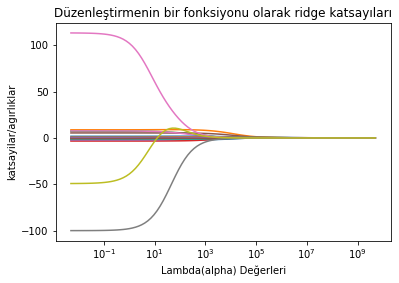

In [96]:
import matplotlib.pyplot as plt
lambdalar = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
katsayilar = []
for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)
    
ax = plt.gca()
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log')


plt.xlabel('Lambda(alpha) Değerleri')
plt.ylabel('katsayilar/agırlıklar')
plt.title('Düzenlileştirmenin bir fonksiyonu olarak ridge katsayıları');

## Tahmin

In [111]:
y_pred = ridge_model.predict(X_test)

In [118]:
from sklearn.metrics import mean_squared_error
print('Hata Karelerinin Ortalamasının Test Hatası: %.10f ' % (np.sqrt(mean_squared_error(y_test,y_pred))))

Hata Karelerinin Ortalamasının Test Hatası: 357.0517922283 
